In [1]:
!pip3 install pydub
!pip3 install SpeechRecognition

In [2]:
# importing libraries 
import speech_recognition as sr 
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence

# create a speech recognition object
r = sr.Recognizer()

# a function that splits the audio file into chunks
# and applies speech recognition
def get_large_audio_transcription(path):
    """
    Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks
    """
    # open the audio file using pydub
    sound = AudioSegment.from_wav(path)  
    # split audio sound where silence is 700 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        min_silence_len = 500,
        # adjust this per requirement
        silence_thresh = sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk 
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        with sr.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            # try converting it to text
            try:
                text = r.recognize_google(audio_listened)
            except sr.UnknownValueError as e:
                print("Error:", str(e))
            else:
                text = f"{text.capitalize()}. "
                print(chunk_filename, ":", text)
                whole_text += text
    # return the text for all chunks detected
    return whole_text

In [3]:
# get_large_audio_transcription("/content/test1.wav")

In [4]:
'''
!sudo apt-get install portaudio19-dev python-all-dev
!pip3 install pyaudio
'''

'\n!sudo apt-get install portaudio19-dev python-all-dev\n!pip3 install pyaudio\n'

In [5]:
'''
with sr.Microphone() as source:
    # read the audio data from the default microphone
    audio_data = r.record(source, duration=5)
    print("Recognizing...")
    # convert speech to text
    text = r.recognize_google(audio_data)
    print(text)
'''

'\nwith sr.Microphone() as source:\n    # read the audio data from the default microphone\n    audio_data = r.record(source, duration=5)\n    print("Recognizing...")\n    # convert speech to text\n    text = r.recognize_google(audio_data)\n    print(text)\n'

In [6]:
x = get_large_audio_transcription("/content/test1.wav")

audio-chunks/chunk1.wav : Last eve. 
audio-chunks/chunk2.wav : I paused beside the blacksmith store. 
audio-chunks/chunk3.wav : And heard the anvil ring the best buy chime. 
audio-chunks/chunk4.wav : Then. 
audio-chunks/chunk5.wav : Looking in. 
audio-chunks/chunk6.wav : Assault upon the floor. 
audio-chunks/chunk7.wav : Oldham has worn with pitching years of time. 
audio-chunks/chunk8.wav : How many animals have you had. 
audio-chunks/chunk9.wav : Said i. 
audio-chunks/chunk10.wav : To where and paschal all these hammers. 
audio-chunks/chunk11.wav : Just one. 
audio-chunks/chunk12.wav : Petit. 
audio-chunks/chunk13.wav : And then with twinkling eye. 
audio-chunks/chunk14.wav : The anvil wears the hammers out. 
audio-chunks/chunk15.wav : You know. 
audio-chunks/chunk16.wav : And so i thought. 
audio-chunks/chunk17.wav : The anvil of god's word. 
audio-chunks/chunk18.wav : For ages skeptic blows have beat upon. 
audio-chunks/chunk19.wav : Yet. 
audio-chunks/chunk20.wav : That is the noi

In [11]:
#Importing Data Manipulation Library:
import pandas as pd

#Importing Scientific computing library:
import numpy as np

#Importing Plotting libraries:
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Text Analysis Libraries:
from textblob import TextBlob
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
!pip install textblob 
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download()
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vader
print('Libraries Imported')

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt
      Package punkt is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Ide

In [15]:
from nltk.corpus import stopwords

In [16]:
#function to remove punctuations
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator).lower()

#function to remove stopwords
sw = stopwords.words('english')
def stopwords(text):
    text = [word for word in text.split() if word not in sw]
    return " ".join(text)

stemmer = SnowballStemmer("english")
#a function to stem words
def stemming(text):    
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [17]:
x = remove_punctuation(x) #punctuation removal
data = stopwords(x) #removing stopwords
sentiment = SentimentIntensityAnalyzer()
result = sentiment.polarity_scores(data)
df = pd.DataFrame(result, index = [1])

In [18]:
import warnings
warnings.simplefilter('ignore')

([<matplotlib.axis.XTick at 0x7f61f63c18d0>,
 [Text(0, 0, 'neg'),
  Text(0, 0, 'neu'),
  Text(0, 0, 'pos'),
  Text(0, 0, 'compound')])

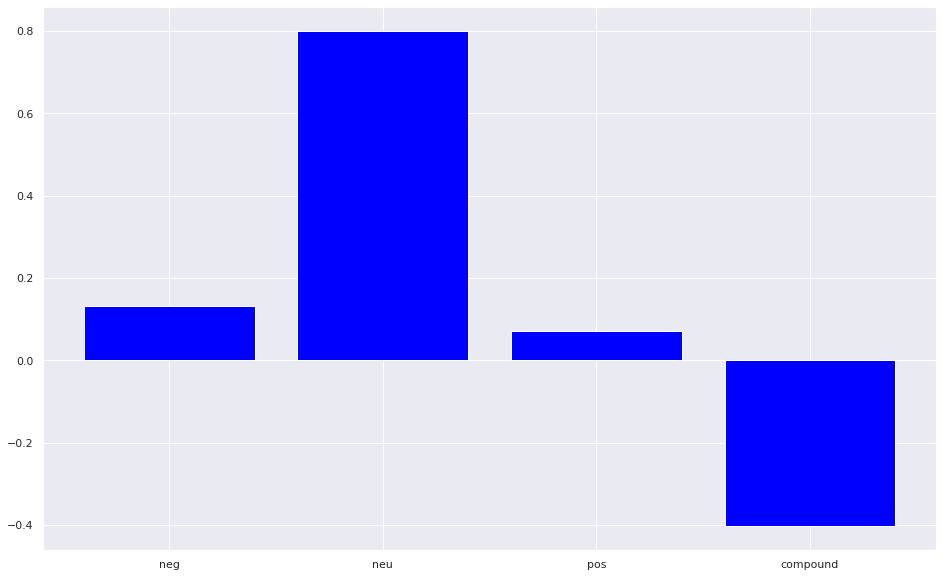

In [19]:
plt.figure(figsize = (16,10))
sns.set_theme()
plt.bar(range(len(result)), list(result.values()), align='center', color = 'blue')
plt.xticks(range(len(result)), list(result.keys()))